<a href="https://colab.research.google.com/github/mikeortiz5190/Basic-Portfolio/blob/master/Nozzle_Design_Code_6_One_trapizoid_node_Segments_ALL_LAYERS_Implicit_Opposite_flow_cooling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CURRENTLY THIS PROJECT IS STILL WORK IN PROGRESS - JUST FOR EDUCATIONAL AND HOBBY PURPOSES ONLY**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure

In [5]:
#################################################################################
######################### DEFINE DRIVING PARAMETERS #############################
#################################################################################

#expected thrust at optimum expansion:
Thrust_at_designC = 120000

#Initial chamber pressure:
# 30 Bar
Po = 3000000

#Initial chamber temperature:
To = 3800

# Fuel Richenss
ch4_rich = 0.1

#mixture ratio:
r = 4/(1+ch4_rich)
print(f'Mixture ratio: {r}')

#specific heat ratio and Molecular weight for LOx:
g_o2 = 1.4
M_O2 = 32

#specific heat ratio and Molecular weight for Liquid Methane:
g_CH4 = 1.32
M_CH4 = 16.04

#specific heat ratio and Molecular weight for H2O:
#https://www.engineeringtoolbox.com/water-vapor-d_979.html
g_H2O = 3.2
M_H2O = 18

#specific heat ratio and Molecular weight for CO2:
#https://www.engineeringtoolbox.com/carbon-dioxide-d_974.html
g_CO2 = 1.43
M_CO2 = 44

Total_molecular_mass = (2*M_H2O) + M_CO2 + (ch4_rich*M_CH4)

percent_H20 = (2*M_H2O)/Total_molecular_mass
percent_CO2 = M_CO2/Total_molecular_mass
percent_CH4 = (ch4_rich*M_CH4)/Total_molecular_mass

#approximated specifc heat ratio:

#g = percent_H20*g_H2O + percent_CO2*g_CO2 + percent_CH4*g_CH4
g = 1 / ((percent_H20/g_H2O) + (percent_CO2/g_CO2) + (percent_CH4/g_CH4))

#gas constant:
#mol weight:
M = 1 / ((percent_H20/M_H2O) + (percent_CO2/M_CO2) + (percent_CH4/M_CH4))
print(f'Effective Molecular weight: {M}')

R_universal = 8314.46

R = R_universal/M

#Atmospheric pressure at design conditions:
p2_design = 20000 
Pressure_ratio = p2_design/Po
print(f'Pressure Ratio: {Pressure_ratio}')

print(f'R:  {R}')
print(f'g:  {g}')

#Find Area ratio:
A_r = 1/ ((((g+1)/2)**(1/(g-1))) * ((p2_design/Po)**(1/g)) * np.sqrt( ((g+1)/(g-1))*(1-(p2_design/Po)**((g-1)/g)) ))
print(f'Throat to exit Area ratio: {A_r}')

# Material Thickness
material_thickness= 0.00635
print(f'Inner liner wall thickness: {material_thickness} m | {material_thickness*39.3701} in')

Mixture ratio: 3.6363636363636362
Effective Molecular weight: 26.323870967741936
Pressure Ratio: 0.006666666666666667
R:  315.8524827214352
g:  1.8874792627597714
Throat to exit Area ratio: 5.478309880020627
Inner liner wall thickness: 0.00635 m | 0.250000135 in


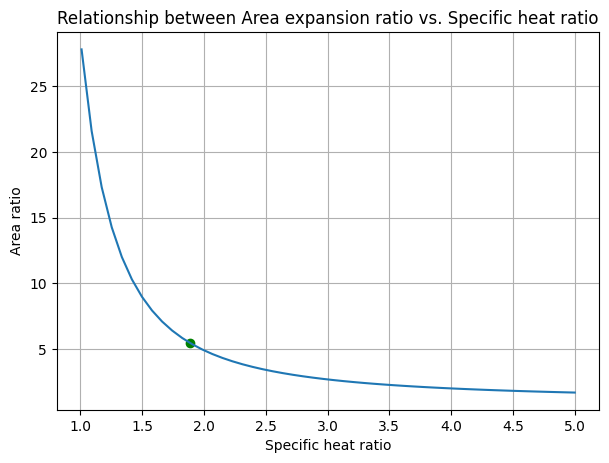

In [6]:
g_test = np.linspace(1.01,5,50)
A_r_test = [1/ ((((x+1)/2)**(1/(x-1))) * ((p2_design/Po)**(1/x)) * np.sqrt( ((x+1)/(x-1))*(1-(p2_design/Po)**((x-1)/x)) )) for x in g_test]
figure(figsize=(7, 5), dpi=100)
plt.plot(g_test,A_r_test)
plt.scatter(g, A_r, color='green')
plt.grid()
plt.title('Relationship between Area expansion ratio vs. Specific heat ratio')
plt.ylabel('Area ratio')
plt.xlabel('Specific heat ratio')
plt.show()

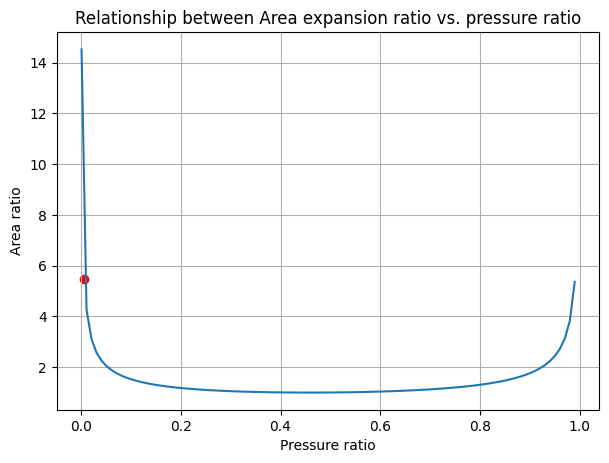

In [7]:
P_ratio = np.linspace(0.001,0.99,100)
A_r_test_2 = [1/ ((((g+1)/2)**(1/(g-1))) * ((i)**(1/g)) * np.sqrt( ((g+1)/(g-1))*(1-(i)**((g-1)/g)) )) for i in P_ratio]
figure(figsize=(7, 5), dpi=100)
plt.plot(P_ratio,A_r_test_2)
plt.scatter(Pressure_ratio,A_r, color='red')
plt.grid()
plt.title('Relationship between Area expansion ratio vs. pressure ratio')
plt.ylabel('Area ratio')
plt.xlabel('Pressure ratio')
plt.show()

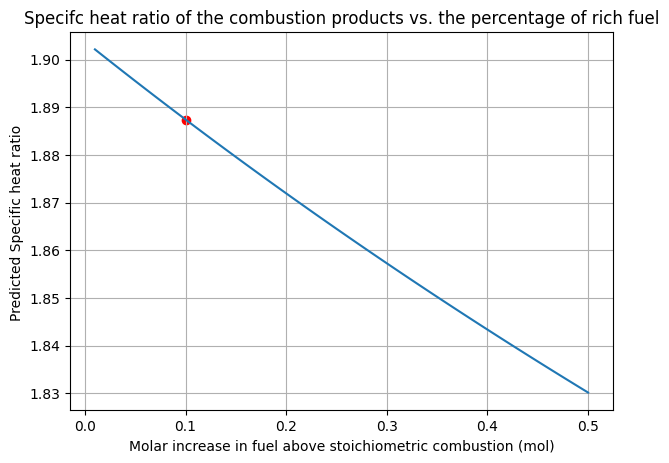

In [40]:
g_variation = []
richness = np.linspace(0.01,0.50,50)
CH4_kg_mol = []
for i in range(len(richness)):
  Total_MM = (2*M_H2O) + M_CO2 + (richness[i]*M_CH4)
  per_H20 = (2*M_H2O)/Total_MM
  per_CO2 = M_CO2/Total_MM
  per_CH4 = (richness[i]*M_CH4)/Total_MM
  
  effective_MM = 1 / ((per_H20/M_H2O) + (per_CO2/M_CO2) + (per_CH4/M_CH4))
  ch4_level = (richness[i]*M_CH4)
  calc_g = 1 / ((per_H20/g_H2O) + (per_CO2/g_CO2) + (per_CH4/g_CH4))
  g_variation.append(calc_g)

figure(figsize=(7, 5), dpi=100)
plt.plot(richness,g_variation)
plt.scatter(ch4_rich,g, color='red')
plt.grid()
plt.title('Specifc heat ratio of the combustion products vs. the percentage of rich fuel')
plt.ylabel('Predicted Specific heat ratio ')
plt.xlabel('Molar increase in fuel above stoichiometric combustion (mol)')
plt.show()

In [9]:
'''
C_star_variation = [np.sqrt(i*R*To) / (i*(2/(i+1)**((i+1)/(i-1)))) for i in g_variation]

figure(figsize=(7, 5), dpi=100)
plt.plot(richness,C_star_variation)
plt.scatter(ch4_rich,np.sqrt(g*R*To) / (g*(2/(g+1)**((g+1)/(g-1)))), color='red')
plt.grid()
plt.title('C* vs. the level of rich fuel')
plt.ylabel('Predicted C*')
plt.xlabel('Percentage of excess fuel')
plt.show()
'''

"\nC_star_variation = [np.sqrt(i*R*To) / (i*(2/(i+1)**((i+1)/(i-1)))) for i in g_variation]\n\nfigure(figsize=(7, 5), dpi=100)\nplt.plot(richness,C_star_variation)\nplt.scatter(ch4_rich,np.sqrt(g*R*To) / (g*(2/(g+1)**((g+1)/(g-1)))), color='red')\nplt.grid()\nplt.title('C* vs. the level of rich fuel')\nplt.ylabel('Predicted C*')\nplt.xlabel('Percentage of excess fuel')\nplt.show()\n"

In [10]:
#################################################################################
######## DETERMINE REMAINNG NOZZLE PARAMETERS FROM PRIMARY PARAMETERS ###########
#################################################################################

#Exhaust velocity for design conditions:
v2 = np.sqrt( (2*g/(g-1))*To*(R)*(1-(p2_design/Po))**((g-1)/g)  )
print(f'Exit exahust velocity at optimum expansion (Exit Pressure: {p2_design} Pa): {v2} m/s')
#mass flow rate - based on design conditions:
m_dot = Thrust_at_designC/v2
print(f'Mass flow rate: {m_dot} kg/s')
#Mass flow rate for LOX and Methane
m_dot_Meth = m_dot/r
m_dot_Lox = m_dot - m_dot_Meth
print(f'Methane mass flow rate: {m_dot_Meth} Kg/s')
print(f'Lox mass flow rate: {m_dot_Lox} Kg/s')
#throat area:
A_t = (m_dot/Po)*np.sqrt((R*To)/(g*(2/(g+1))**((g+1)/(g-1))))
#Exit Area
A_exit = A_r*A_t
rt = np.sqrt(A_t/np.pi)
r2 = np.sqrt(A_exit/np.pi)
print(f'Throat Area: {A_t} m2')
print(f'Throat radius: {rt} m')
print(f'Area exit: {A_exit} m2' )
print(f'Exit radius: {r2} m')
#Thrust at sea level:
Thrust_sea_level= m_dot*v2 +(p2_design-101325)*A_exit
print(f'Thrust at sea level: {Thrust_sea_level} N\n')
# Characteristic velocity
c_star = np.sqrt(g*R*To) / (g*(2/(g+1)**((g+1)/(g-1))))
print(f'Calculated C*: {c_star} m/s')
# Discharge coefficient
C_discharge = 1/c_star
print(f'Calculated Discharge coefficient Cd: {C_discharge} m/s')
# Thrust coefficient - actual CF is found through testing
CF = v2/c_star
print(f'Calculated Thrust coefficient at optimum expansion: {CF}')
# Specific impulse at optimum expansion
Isp = v2/9.81
print(f'Calculated Specific Impulse at optimum expansion- Isp: {Isp} seconds')

Exit exahust velocity at optimum expansion (Exit Pressure: 20000 Pa): 2255.9422512412407 m/s
Mass flow rate: 53.192850984538666 kg/s
Methane mass flow rate: 14.628034020748133 Kg/s
Lox mass flow rate: 38.564816963790534 Kg/s
Throat Area: 0.025696814002397452 m2
Throat radius: 0.0904408643279639 m
Area exit: 0.14077511003438636 m2
Exit radius: 0.2116839844025904 m
Thrust at sea level: 108551.46417645353 N

Calculated C*: 12560.154762078144 m/s
Calculated Discharge coefficient Cd: 7.961685337024818e-05 m/s
Calculated Thrust coefficient at optimum expansion: 0.17961102342882143
Calculated Specific Impulse at optimum expansion- Isp: 229.96353223661984 seconds


Ideas: 
1. C* vs richness of fuel
2. C* vs To, gama
3. Ideal Specifc impulse vs chamber pressure / chamber temp / richness of fuel


In [11]:
#################################################################################
############################ EXIT MACH NUMBER ###################################
#################################################################################
guesses = 10
m_guess = 2
m_new = 1
for i in range(guesses):
    m_new = np.sqrt((2/(g-1)) * (-1 + ((g+1)/2) * (m_guess * A_r)**(2 * (g-1) / (g+1))))
    m_guess = m_new
    #print(m_new)
print(f'Exit mach number is: {m_new}')
m_exit = m_new

Exit mach number is: 4.6386451903249


In [12]:
#################################################################################
############ DEFINE THE PRIMARY NOZZLE PROFILE - INNER MOST LAYER ###############
#################################################################################

#Chamber volume
Chamber_stay_time = 0.05
Vc = m_dot*R*To*Chamber_stay_time/Po
#chamber area:
Ac = 3*(np.pi*rt**2)
Lc = Ac/Vc

def Build_Nozzle(throat_radius, exit_radius, Area_ratio, chamber_volume, chamber_area, chamber_length, bell_percentage):
  '''find ROA nozzle dimensions'''
  l_bell = bell_percentage*(np.sqrt(Area_ratio)-1)*throat_radius / np.tan(np.pi*15 / 180)
  print(f'Bell nozzle length is: {l_bell}\n')
  theta1 = 235
  theta2 = 270
  theta3 = 310
  theta_n = theta3-270
  #convergent curve
  theta1_range = list(np.linspace(theta1,theta2,40))
  x_1 = [1.5*throat_radius*np.cos(np.pi * i / 180) for i in theta1_range]
  x_1[len(x_1)-1]=0
  y_1 = [((1.5*throat_radius + throat_radius) + 1.5 * throat_radius * np.sin(np.pi * i / 180)) for i in theta1_range]
  print(f'theta 1 range: {theta1_range} with length {len(theta1_range)}\n')
  print(f'x_1: {x_1} with length {len(x_1)}\n')
  print(f'y_1: {y_1} with length {len(y_1)}\n')
  # divergent curve
  theta2_range = list(np.linspace(theta2, theta3, 20))
  x_2 = [0.382 * throat_radius * np.cos((np.pi * i / 180)) for i in theta2_range]
  x_2 = x_2[1:]
  y_2 = [((0.382 * throat_radius + throat_radius) + 0.382 * throat_radius * np.sin((np.pi * i / 180))) for i in theta2_range]
  y_2 = y_2[1:]
  print(f'theta 2 range: {theta2_range} with length {len(theta2_range)}\n')
  print(f'x_1: {x_2} with length {len(x_2)}\n')
  print(f'y_1: {y_2} with length {len(y_2)}\n')
  #parabola
  a11 = ((0.382 * throat_radius + throat_radius) + 0.382 * throat_radius * np.sin((np.pi * theta3 / 180)))**2
  a12 = (0.382 * throat_radius + throat_radius) + 0.382 * throat_radius * np.sin(np.pi * theta3 / 180)
  a13 = 1
  a21 = exit_radius**2
  a22 = exit_radius
  a23 = 1
  a31 = 2*((0.382 * throat_radius + throat_radius) + 0.382 * throat_radius * np.sin(np.pi * theta3 / 180))
  a32 = 1
  a33 = 0
  A = np.array([ [a11,a12,a13] , [a21,a22,a23] , [a31,a32,a33] ])
  b1 = 0.382 * throat_radius * np.cos(np.pi * theta3 / 180)
  b2 = l_bell
  b3 = 1/np.tan(np.pi * theta_n / 180)
  B = np.array([b1,b2,b3])
  A_inv = np.linalg.inv(A)
  C = np.dot(A_inv,B)
  print(f'A matrix: {A}\n')
  print(f'B matrix: {B}\n')
  print(f'C Matrix: {C}\n')
  x_3 = list(np.linspace(x_2[len(x_2)-1]+0.001,l_bell,200))
  y_3 = []
  for x in x_3:
    y = (-C[1]+np.sqrt(C[1]**2 - 4*C[0]*(C[2]-x))) / (2*C[0])
    y_3.append(y)
  print(f'x_1: {x_1} with length {len(x_1)}')
  print(f'y_1: {y_1} with length {len(y_1)}\n')
  print(f'x_2: {x_2} with length {len(x_2)}')
  print(f'y_2: {y_2} with length {len(y_2)} and type: {type(y_2)}\n')
  print(f'x_3: {x_3} with length {len(x_3)}')
  print(f'y_3: {y_3} with length {len(y_3)} and type: {type(y_3)}\n')
  x_net = x_1 + x_2 + x_3
  y_net = y_1 + y_2 + y_3
  #print(f'x_1: {x_net} with length {len(x_net)}')
  #print(f'x_1: {y_net} with length {len(y_net)} ')
  rc = np.sqrt(chamber_area/np.pi)
  print(rc)
  end_of_TC = (rc-y_net[0])/np.tan(35*np.pi/180)
  x_c = list(np.linspace(x_net[0]-chamber_length-end_of_TC, x_net[0]-end_of_TC, 40))
  y_c = [rc for i in range(len(x_c))]
  x_c2 = list(np.linspace(x_c[len(x_c)-1],x_net[0],40))
  x_c2 = x_c2[1:len(x_c2)-1]
  y_c2 = [(abs(i-x_net[0])*np.tan(35*np.pi/180))+y_net[0] for i in x_c2]
  x_total = x_c + x_c2 + x_net
  y_total = y_c + y_c2 + y_net
  #figure(figsize=(16, 6), dpi=100)
  #plt.plot(x_total, y_total)
  #plt.show()
  #############################################################################
  # Here the code will homogenize the axial delta x distance between each node.
  n = 200
  delta_axial_x = abs(x_total[0]-x_total[len(x_total)-1]) / n
  print(f'delta_axial_x: {delta_axial_x}')
  nx = []
  ny = []
  axial_x = x_total[0]
  for i in range(n):
    if i == 0 :
      nx.append(x_total[0])
      ny.append(y_total[0])  
    else:
      axial_x = axial_x + delta_axial_x
      #print(f'index: {i}')
      #print(f'position: {axial_x}')
      nx.append(axial_x)
      for j in range(len(x_total)):
        if axial_x > x_total[j-1] and axial_x <= x_total[j]:
          y = (axial_x - x_total[j]) * (y_total[j-1]-y_total[j]) / (x_total[j-1]-x_total[j]) + y_total[j]
          ny.append(y)
          break
        else:
          continue
  nx.append(x_total[len(x_total)-1])
  ny.append(y_total[len(y_total)-1])

  #figure(figsize=(16, 6), dpi=100)
  #plt.scatter(nx, ny)
  #plt.show()

  return nx, ny

In [13]:
nodes_x, nodes_y = Build_Nozzle(rt,r2,A_r,Vc,Ac,Lc,0.8)

Bell nozzle length is: 0.36198838734934424

theta 1 range: [235.0, 235.89743589743588, 236.7948717948718, 237.69230769230768, 238.5897435897436, 239.48717948717947, 240.3846153846154, 241.28205128205127, 242.17948717948718, 243.07692307692307, 243.97435897435898, 244.87179487179486, 245.76923076923077, 246.66666666666666, 247.56410256410257, 248.46153846153845, 249.35897435897436, 250.25641025641025, 251.15384615384616, 252.05128205128204, 252.94871794871796, 253.84615384615384, 254.74358974358975, 255.64102564102564, 256.53846153846155, 257.43589743589746, 258.3333333333333, 259.2307692307692, 260.12820512820514, 261.02564102564105, 261.9230769230769, 262.8205128205128, 263.71794871794873, 264.61538461538464, 265.5128205128205, 266.4102564102564, 267.3076923076923, 268.2051282051282, 269.1025641025641, 270.0] with length 40

x_1: [-0.07781212299261302, -0.07606204004280599, -0.07429329670368928, -0.07250632690313645, -0.07070156904054019, -0.06887946587925943, -0.06704046443799505, -0

In [14]:
#################################################################################
################### FUNCTION TO CREATE PROFILE OFFSETS ##########################
#################################################################################
def outer_skin(x, y, offset):
  y_new=[]
  x_new=[]
  x_pos=0
  y_pos=0
  x_new.append(x[0])
  y_new.append(y[0]+offset)
  for i in range(1,len(x)-1):
    x_pos=0
    y_pos=0
    if y[i]==y[i+1]:
      y_new.append(y[i]+offset)
      x_new.append(x[i])
    elif y[i] > y[i+1]:
      x_pos = offset*np.cos((np.pi/2) - np.arctan(abs(y[i+1]-y[i-1])/(x[i+1]-x[i-1])))
      y_pos = offset*np.sin((np.pi/2) - np.arctan(abs(y[i+1]-y[i-1])/(x[i+1]-x[i-1])))
      x_new.append(x[i]+x_pos)
      y_new.append(y[i]+y_pos)
      #print(x_pos)
      #print(y_pos)
    elif y[i] < y[i+1]:
      x_pos = -offset*np.cos((np.pi/2) - np.arctan((y[i+1]-y[i-1])/(x[i+1]-x[i-1])))
      y_pos = offset*np.sin((np.pi/2) - np.arctan((y[i+1]-y[i-1])/(x[i+1]-x[i-1])))
      x_new.append(x[i]+x_pos)
      y_new.append(y[i]+y_pos)
      #print(f'delta X: {x_pos}')
      #print(f'delta Y: {y_pos}')
  x_new.append(x[len(x)-1])
  y_new.append(y[len(y)-1]+offset)
  return x_new, y_new

In [15]:
#################################################################################
################### DEFINE THE REGEN JACKET CHANNEL HEIGHT ######################
#################################################################################
outer_x, outer_y = outer_skin(nodes_x, nodes_y, material_thickness)
cooling_channel_gap = 0.0126
inner_liner_x, inner_liner_y =  outer_skin(outer_x, outer_y, cooling_channel_gap)
outer_linner_thickness = material_thickness
outer_liner_x, outer_liner_y = outer_skin(inner_liner_x,inner_liner_y,outer_linner_thickness)

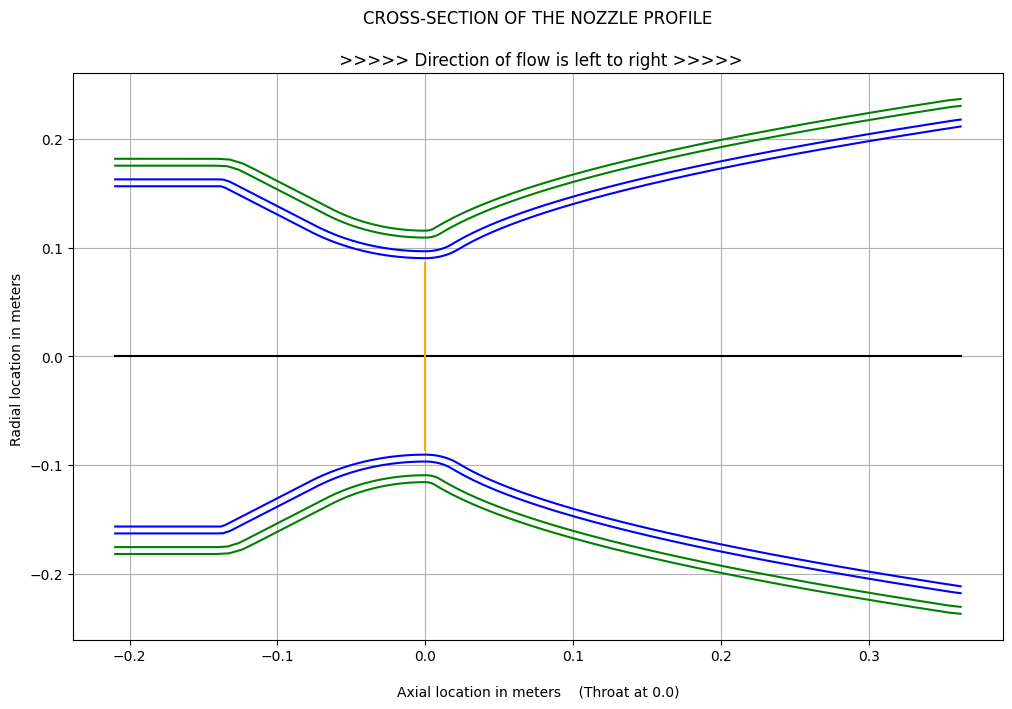

In [16]:
#################################################################################
################### CROSS-SECTION OF THE NOZZLE PROFILE #########################
#################################################################################
figure(figsize=(12, 7.5), dpi=100)
inner_color = 'blue'
outer_color = 'green'
plt.plot(nodes_x, nodes_y, color=inner_color)
plt.plot(outer_x, outer_y, color=inner_color)
plt.plot(inner_liner_x, inner_liner_y, color=outer_color)
plt.plot(outer_liner_x, outer_liner_y, color=outer_color)

def flip(array):
  a=[]
  for i in range(len(array)):
    a.append(-1*array[i])
  return a

y1 = flip(nodes_y)
y2 = flip(outer_y)
y3 = flip(inner_liner_y)
y4 = flip(outer_liner_y)
plt.plot(nodes_x, y1, color=inner_color)
plt.plot(outer_x, y2, color=inner_color)
plt.plot(inner_liner_x, y3, color=outer_color)
plt.plot(outer_liner_x, y4, color=outer_color)

centerline = np.zeros(len(nodes_x))
plt.plot(nodes_x, centerline, color = 'black')

plt.plot([0,0],[0.95*max(y1), 0.95*min(nodes_y)], color = 'orange')

plt.grid()
plt.ylabel('Radial location in meters ')
plt.xlabel('\nAxial location in meters    (Throat at 0.0)')
plt.title('CROSS-SECTION OF THE NOZZLE PROFILE\n\n >>>>> Direction of flow is left to right >>>>>')
plt.show()

In [17]:
#################################################################################
############### OPENS TXT FILE AND WRITES PROFILE COODRINATES ###################
#################################################################################
f = open("cd_nozzle.txt", "a")

for i in range(len(nodes_x)):
    f.write(f'{round(nodes_x[i],5)}   {round(nodes_y[i],5)}\n')
    
f.close()

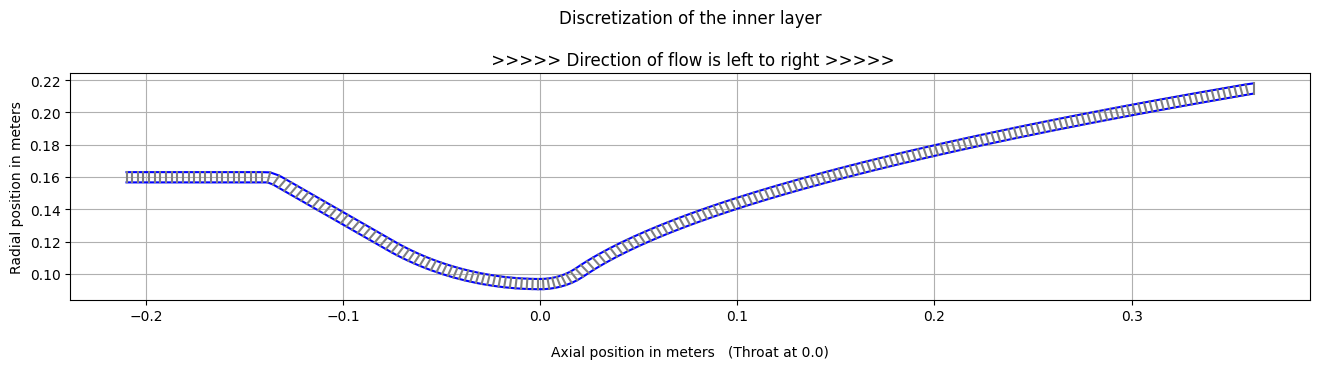

In [18]:
#################################################################################
############## VISUALIZE DISCRETIZATION OF INNER NOZZLE LAYER ###################
#################################################################################
figure(figsize=(16, 3), dpi=100)
s1=0
s2=len(nodes_x)
plt.plot(nodes_x[s1:s2],nodes_y[s1:s2], color='blue')
plt.plot(outer_x[s1:s2],outer_y[s1:s2], color='blue')
#plt.scatter(nodes_x[s1:s2],nodes_y[s1:s2], color='orange')
#plt.scatter(outer_x[s1:s2],outer_y[s1:s2], color='orange')
#plt.scatter(nodes_x[59],nodes_y[59])

for i in range(s1,s2):
  plt.plot([nodes_x[i], outer_x[i]], [nodes_y[i], outer_y[i]], color = 'grey')

plt.grid()
plt.title('Discretization of the inner layer\n\n >>>>> Direction of flow is left to right >>>>>')
plt.xlabel('\nAxial position in meters   (Throat at 0.0)')
plt.ylabel('Radial position in meters')
plt.show()

In [19]:
#################################################################################
########## MACH NUMBERS THROUGH CONVERGING AND DIVERGING PORTION ################
#################################################################################

#mach numbers from throat to exit
throat_index = 0
end_of_chamber_index = 0
for i in range(1,len(nodes_y)-1):
  if nodes_y[i] < nodes_y[i-1] and nodes_y[i] < nodes_y[i+1]:
    throat_index=i
  if nodes_y[i] == nodes_y[i-1] and nodes_y[i] > nodes_y[i+1]:
    end_of_chamber_index = i
  else:
    continue
print(f'index of Throat: {throat_index}')
print(f'index where the chamber ends: {end_of_chamber_index}')
  
M2 = []
for r in nodes_y[throat_index:]:
    Az2 = np.pi*r**2
    Ar2 = Az2/A_t
    M_guess2 = 1.1
    for i in range(30):
        M_new2 = np.sqrt( (2/(g-1)) * (-1 + ((g+1)/2) * (M_guess2 * Ar2)**(2 * (g-1) / (g+1))))
        M_guess2 = M_new2
        if i == 29:
            M2.append(M_new2)
#mach numbers from entrance to throat to exit
M1=[]
for r in nodes_y[end_of_chamber_index:throat_index]:
    Az = np.pi*r**2
    Ar = A_t/Az
    #print(Ar)
    M_guess = 0.1
    for i in range(30):
        #M_new = np.sqrt( ((2+(g-1)) / ( (g-1) * (Ar/M_guess)**(2*(g-1)/(g+1)) )) - (2/(g-1)) )
        M_new = Ar / np.sqrt( ( (1+(g-1)/2) / ((1+(M_guess**2)*(g-1)/2)) ) ** ((g+1)/(g-1)) )
        M_guess = M_new
        if i == 29:
            M1.append(M_new)

M=M1+M2

index of Throat: 73
index where the chamber ends: 25


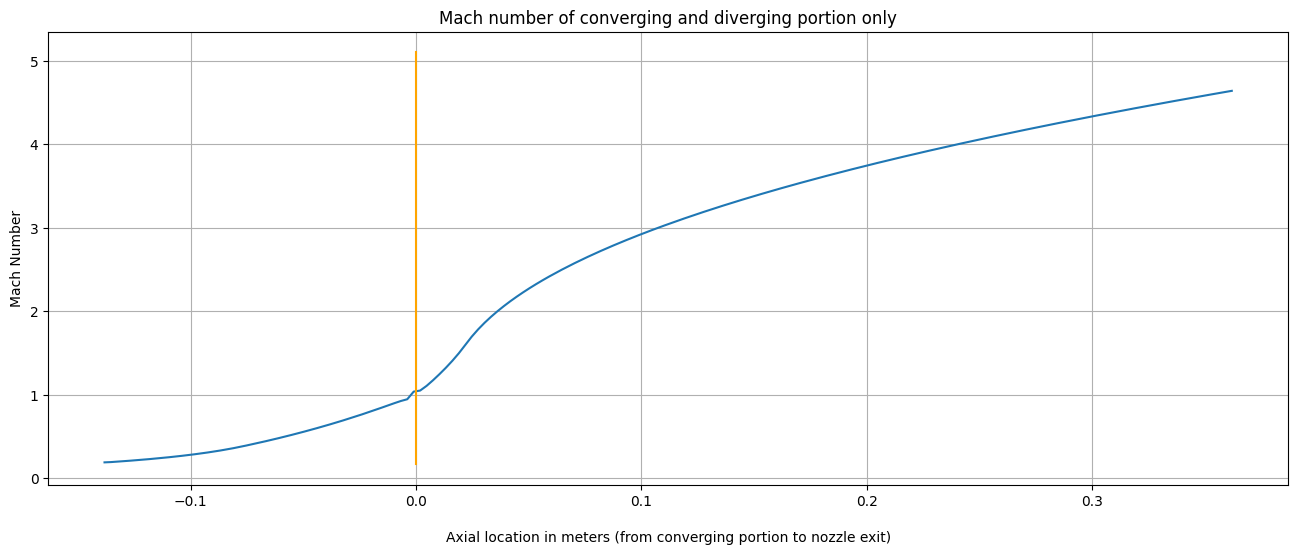

In [20]:
figure(figsize=(16, 6), dpi=100)
plt.plot(nodes_x[end_of_chamber_index:], M)
plt.plot([0,0],[0.9*min(M), 1.1*max(M)], color = 'orange')
plt.grid()
plt.title('Mach number of converging and diverging portion only')
plt.ylabel('Mach Number')
plt.xlabel('\nAxial location in meters (from converging portion to nozzle exit)')
plt.show()

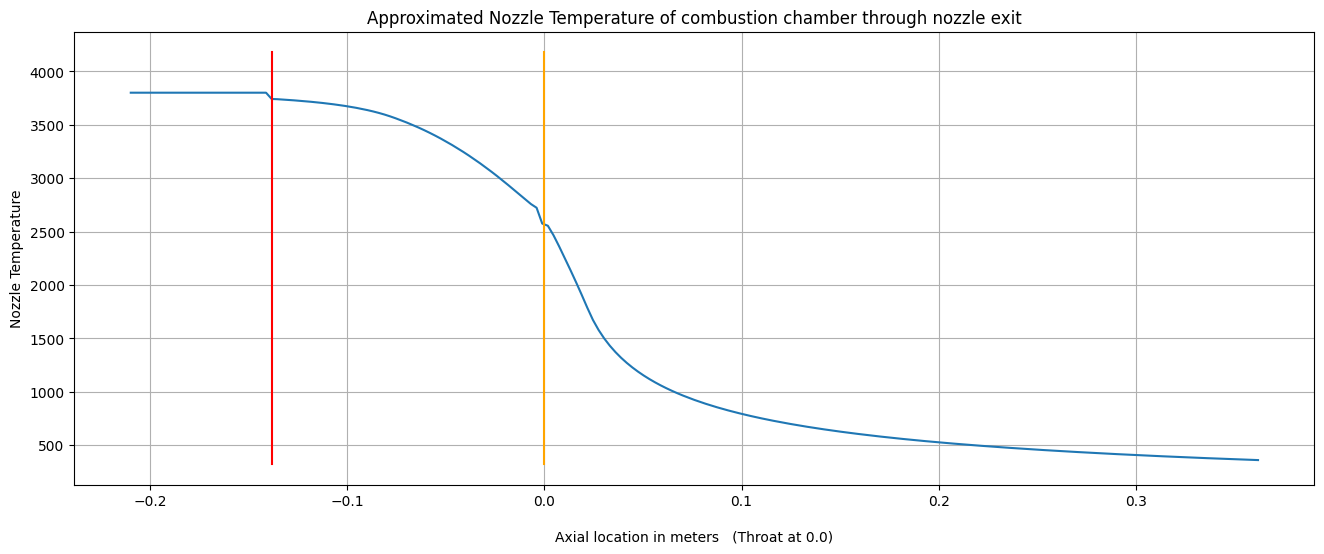

In [21]:
T_nozzle = [To/(1+0.5*(g-1)*i**2) for i in M]
qq=len(T_nozzle)
for i in range(len(nodes_x)-qq):
  T_nozzle.insert(0,To)

figure(figsize=(16, 6), dpi=100)
#plt.plot(nodes_x[end_of_chamber_index:], T_nozzle)
plt.plot(nodes_x, T_nozzle)
plt.plot([0,0],[0.9*min(T_nozzle), 1.1*max(T_nozzle)], color = 'orange')
plt.plot([nodes_x[end_of_chamber_index],nodes_x[end_of_chamber_index]],[0.9*min(T_nozzle), 1.1*max(T_nozzle)], color = 'red')
plt.grid()
plt.title('Approximated Nozzle Temperature of combustion chamber through nozzle exit')
plt.ylabel('Nozzle Temperature')
plt.xlabel('\nAxial location in meters   (Throat at 0.0)')
plt.show()

In [22]:
#T_nozzle

In [23]:
#################################################################################
###### FIND THE LEFT/RIGHT/TOP/BOTTOM/CROSS-SECTIONAL AREAS OF EACH NODE ########
#################################################################################

def find_areas(x1,y1,x2,y2):
  Area_array = []
  dz = []
  for i in range(1,len(x1)):
    if y2[i] == y2[i-1]:
      A_in = abs(x1[i]-x1[i-1])*2*np.pi*y1[i]
      A_out = abs(x2[i]-x2[i-1])*2*np.pi*y2[i]
      A_top = np.pi*(y2[i-1]**2 - y1[i-1]**2)
      A_bottom = np.pi*(y2[i]**2 - y1[i]**2)
      A_c = A_top
      delta_z = abs(x1[i]-x1[i-1])
      Area_array.append([A_in, A_out, A_top, A_bottom, A_c])
      dz.append(delta_z)
    else:
      if y2[i] < y2[i-1]:
        r1 = y1[i]
        R1 = y1[i-1]
        r2 = y2[i]
        R2 = y2[i-1]
        r3 = (R1+r1)/2
        R3 = (R2+r2)/2
        s1 = np.sqrt((x1[i]-x1[i-1])**2 + (y1[i]-y1[i-1])**2)
        s2 = np.sqrt((x2[i]-x2[i-1])**2 + (y2[i]-y2[i-1])**2)
        s3 = np.sqrt((x1[i-1]-x2[i-1])**2 + (y1[i-1]-y2[i-1])**2)
        s4 = np.sqrt((x1[i-1]-x2[i-1])**2 + (y1[i-1]-y2[i-1])**2)
        s5 = np.sqrt( (np.mean([x1[i],x1[i-1]] - np.mean([x2[i],x2[i-1]])))**2 + (np.mean([y1[i],y1[i-1]] - np.mean([y2[i],y2[i-1]])))**2)      
      elif y2[i] > y2[i-1]:
        r1 = y1[i-1]
        R1 = y1[i]
        r2 = y2[i-1]
        R2 = y2[i]
        r3 = (R1+r1)/2
        R3 = (R2+r2)/2
        s1 = np.sqrt((x1[i]-x1[i-1])**2 + (y1[i]-y1[i-1])**2)
        s2 = np.sqrt((x2[i]-x2[i-1])**2 + (y2[i]-y2[i-1])**2)
        s3 = np.sqrt((x1[i-1]-x2[i-1])**2 + (y1[i-1]-y2[i-1])**2)
        s4 = np.sqrt((x1[i-1]-x2[i-1])**2 + (y1[i-1]-y2[i-1])**2)
        s5 = np.sqrt( (np.mean([x1[i],x1[i-1]] - np.mean([x2[i],x2[i-1]])))**2 + (np.mean([y1[i],y1[i-1]] - np.mean([y2[i],y2[i-1]])))**2)  
      A_in = np.pi*s1*(r1 + R1)
      A_out = np.pi*s2*(r2 + R2)
      A_top = np.pi*s3*(R1 + R2)
      A_bottom = np.pi*s4*(r1 + r2)
      A_c = np.pi*s5*(r3 + R3)
      Area_array.append([A_in, A_out, A_top, A_bottom, A_c])
      delta_z = abs(x1[i]-x1[i-1])
      dz.append(delta_z)

  return Area_array, dz

Areas, ddz = find_areas(nodes_x,nodes_y,outer_x,outer_y)

In [24]:
#for i in range(len(Areas)):
  #print(f'inner area: {Areas[i][0]}, outer area: {Areas[i][1]} at node: {i}')

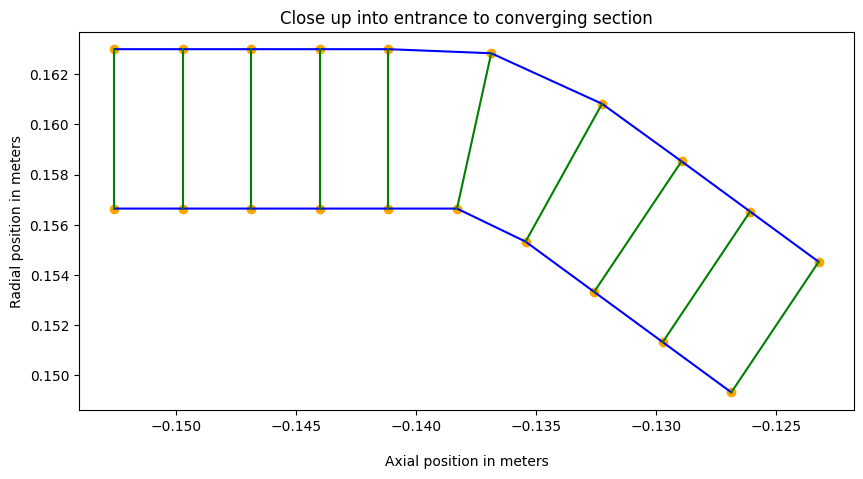

In [25]:
figure(figsize=(10, 5), dpi=100)
t1= end_of_chamber_index-5
t2=end_of_chamber_index+5
plt.plot(nodes_x[t1:t2],nodes_y[t1:t2], color='blue')
plt.plot(outer_x[t1:t2],outer_y[t1:t2], color='blue')
plt.scatter(nodes_x[t1:t2],nodes_y[t1:t2], color='orange')
plt.scatter(outer_x[t1:t2],outer_y[t1:t2], color='orange')

for i in range(t1,t2):
  plt.plot([nodes_x[i], outer_x[i]], [nodes_y[i], outer_y[i]], color = 'green')

plt.title('Close up into entrance to converging section') 
plt.xlabel('\nAxial position in meters')
plt.ylabel('Radial position in meters')

#plt.grid()
plt.show()

Fuel mass flow rate: 14.628034020748133
coolant fuel mass flow rate: 14.628034020748133


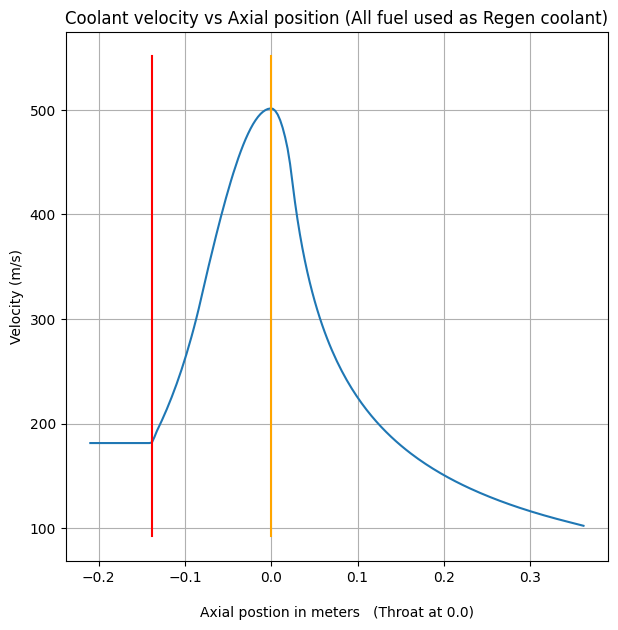

In [26]:
# COOLANT VELOCITY THROUGH REGEN JACKET
#################################################################################
coolant_velocity = []
Liquid_meth_density = 0.657
percentage_of_total_mdot_meth = 1
coolant_m_dot_meth = percentage_of_total_mdot_meth*m_dot_Meth
print(f'Fuel mass flow rate: {m_dot_Meth}')
print(f'coolant fuel mass flow rate: {coolant_m_dot_meth}')
for i in range(len(nodes_x)):
  s=np.sqrt((inner_liner_x[i] - outer_x[i])**2 + (inner_liner_y[i] - outer_y[i])**2)
  #coolant_velocity.append((coolant_m_dot_meth) / (Liquid_meth_density*np.pi*s*(inner_liner_y[i] + outer_y[i])))
  coolant_velocity.append((coolant_m_dot_meth) / (Liquid_meth_density*np.pi*outer_y[i]*np.sqrt(inner_liner_y[i]**2 + outer_y[i]**2))) 

figure(figsize=(7, 7), dpi=100)
plt.plot(nodes_x,coolant_velocity)
plt.plot([0,0],[0.9*min(coolant_velocity), 1.1*max(coolant_velocity)], color = 'orange')
plt.plot([nodes_x[end_of_chamber_index],nodes_x[end_of_chamber_index]],[0.9*min(coolant_velocity), 1.1*max(coolant_velocity)], color = 'red')
plt.grid()
percentage = percentage_of_total_mdot_meth*100
if percentage == 1:
  plt.title(f'Coolant velocity vs Axial position at {percentage}% of the total fuel mass flow rate')
else:
  plt.title(f'Coolant velocity vs Axial position (All fuel used as Regen coolant)')
plt.ylabel('Velocity (m/s)')
plt.xlabel('\nAxial postion in meters   (Throat at 0.0)')
plt.show()


In [27]:
#################################################################################
###### USE A BACKWARD DIFFERENCE METHOD FOR SIMULTANEOUS EQUATIONS ##############
#################################################################################

#Solver for Transient Temp

#first we need to define an initial condition for all the nodes,
#Assuming cryogenic inert fluid is primed into the plumbing and maintained for a while,
#we can call the initial condition as very near this cryogenic temp.

#################################################################################

total_nodes = len(Areas)
##################################################################################
#Heat transfer properties Nozzle
h_chamber = 1000
density = 8900
k=398
C_Cu=389
h_atmosphere = 10
delta_t = 0.1

T_fuel_history=[]
heat_flux_history =[]
heat_transfer_history = []

##################################################################################
# Calculating Heat transfer properties for coolant fuel

Cp_temp = 35*10^3
thermal_diffusivity_nozzle = k/(density*C_Cu)
kinematic_viscosity_meth = 1.91e-6
Pr = (kinematic_viscosity_meth/thermal_diffusivity_nozzle)**0.333
Nu_constant_converging = k*(Pr**0.333)*0.021*((inner_liner_y[0]-outer_y[0])/kinematic_viscosity_meth)**0.8
Nu_constant_diverging = Nu_constant_converging
h_fuel_array =[]
for i in range(total_nodes):
  if nodes_y[i] >= nodes_y[i+1]:
    h_fuel_array.append(Nu_constant_converging*(coolant_velocity[i+1]**0.8))
  else:
    h_fuel_array.append(Nu_constant_diverging*(coolant_velocity[i+1]**0.8))

##################################################################################
# Setting up the [A] matrix for numerical solver - in the form [A]{T} = {C}

AA = []
for i in range(total_nodes):
    row = [0 for i in range(total_nodes)]
    #A = A_left , A_right , A_top , A_bottom, A_center    
    if i == 0:
        '''FIRST SLICE OF NODES --- TOP NODES ARE INSULATED FOR SIMPLICITY'''
        row[i+1] = -k*Areas[i][3]/ddz[i]
        row[i]   = k*Areas[i][3]/ddz[i] + h_chamber*Areas[i][0] + h_fuel_array[i]*Areas[i][1] + k*Areas[i][2]/ddz[i] + density*C_Cu*Areas[i][4]*ddz[i]/(2*delta_t)       
        AA.append(row)
    elif i == total_nodes-1:
        '''LAST SLICE OF NODES, BOTTOM NODES ARE NATURALLY CONVECTED '''
        row[i-1] = -k*Areas[i][2]/ddz[i]
        row[i]   = k*Areas[i][2]/ddz[i] + h_chamber*Areas[i][0] + h_fuel_array[i]*Areas[i][1] + h_atmosphere*Areas[i][3] + density*C_Cu*Areas[i][4]*ddz[i]/(2*delta_t)       
        AA.append(row)
    else:
        '''ALL OTHER NODES IN BETWEEN'''
        row[i-1] = -k*Areas[i][2]/ddz[i]
        row[i+1] = -k*Areas[i][3]/ddz[i]
        row[i]   = k*(Areas[i][2]/ddz[i] + Areas[i][3]/ddz[i]) + h_chamber*Areas[i][0] + h_fuel_array[i]*Areas[i][1] + density*C_Cu*Areas[i][4]*ddz[i]/(2*delta_t)        
        AA.append(row)
        
AA=np.array(AA)

#################################################################################
# Setting up the {C} vector for numerical solver

# Simultaneously solving for the increase in fule through regen jacket passing each node.

steps = 1200
T=[]
T_atm = 273
initial_nodal_temp = 100
T.append([initial_nodal_temp for x in range(total_nodes)])


#A = A_left , A_right , A_top , A_bottom, A_center
C_matrix = []
#Reverse nodes for opposite flow cooling:
n1=[i for i in range(total_nodes)]
for t in range(1,steps):
    CC = []
    T_fuel = 100
    T_fuel_for_i = []
    q_flux_for_i = []
    q_total_to_fuel = []
    for i in reversed(n1):
        if i == total_nodes-1:
            CC.append(h_chamber*Areas[i][0]*T_nozzle[i] + h_fuel_array[i]*Areas[i][1]*T_fuel + h_atmosphere*Areas[i][3]*T_atm + T[t-1][i]*density*C_Cu*Areas[i][4]*ddz[i]*0.5/delta_t)
            T_fuel_for_i.append(T_fuel)
            q_flux_for_i.append(0)
            q_total_to_fuel.append(0)
        elif i == 0:
            a1 = 1/(h_chamber*Areas[i][0])
            a2 = np.log(nodes_y[i]/outer_y[i]) / (2*np.pi*k*ddz[i])
            a3 = 1/(h_fuel_array[i]*Areas[i][1])
            q_to_fuel = (T_nozzle[i]-T_fuel) / (a1+a2+a3)
            q_total_to_fuel.insert(0,q_to_fuel)
            q_flux_for_i.insert(0,q_to_fuel / Areas[i][1])
            T_fuel = T_fuel + q_to_fuel/(coolant_m_dot_meth*Cp_temp)
            T_fuel_for_i.insert(0,T_fuel)
            CC.insert(0,h_chamber*Areas[i][0]*T_nozzle[i] + h_fuel_array[i]*Areas[i][1]*T_fuel + k*Areas[i][2]/ddz[i]*500 + T[t-1][i]*density*C_Cu*Areas[i][4]*ddz[i]*0.5/delta_t)
        else:
            a1 = 1/(h_chamber*Areas[i][0])
            a2 = np.log(nodes_y[i]/outer_y[i]) / (2*np.pi*k*ddz[i])
            a3 = 1/(h_fuel_array[i]*Areas[i][1])
            q_to_fuel = (T_nozzle[i]-T_fuel) / (a1+a2+a3)
            q_total_to_fuel.insert(0,q_to_fuel)
            q_flux_for_i.insert(0,q_to_fuel / Areas[i][1])
            T_fuel = T_fuel + q_to_fuel/(coolant_m_dot_meth*Cp_temp)
            T_fuel_for_i.insert(0,T_fuel)
            CC.insert(0,h_chamber*Areas[i][0]*T_nozzle[i] + h_fuel_array[i]*Areas[i][1]*T_fuel + T[t-1][i]*density*C_Cu*Areas[i][4]*ddz[i]*0.5/delta_t)
    heat_flux_history.append(q_flux_for_i)
    T_fuel_history.append(T_fuel_for_i)
    heat_transfer_history.append(q_total_to_fuel)
    C_matrix.append(CC)
    CC = np.array(CC)
#################################################################################
    #Matrix Solver     
    T_solved = np.dot(np.linalg.inv(AA),CC)
    T.append(list(T_solved))


In [28]:
#################################################################################
################################### SOLUTIONS ###################################
#################################################################################

Temp of Nozzle: 351.6526604476206 K at index: 0, position: -0.2097763820509318
Temp of Nozzle: 299.8597667396793 K at index: 1, position: -0.20691755820393043
Temp of Nozzle: 280.93076253589425 K at index: 2, position: -0.20405873435692906
Temp of Nozzle: 273.18704285563217 K at index: 3, position: -0.2011999105099277
Temp of Nozzle: 269.2497754514311 K at index: 4, position: -0.19834108666292632
Temp of Nozzle: 266.6073978306756 K at index: 5, position: -0.19548226281592496
Temp of Nozzle: 264.4050392039837 K at index: 6, position: -0.1926234389689236
Temp of Nozzle: 262.35172343296347 K at index: 7, position: -0.18976461512192222
Temp of Nozzle: 260.34840940093136 K at index: 8, position: -0.18690579127492085
Temp of Nozzle: 258.3613856290429 K at index: 9, position: -0.18404696742791948
Temp of Nozzle: 256.37917703058815 K at index: 10, position: -0.18118814358091812
Temp of Nozzle: 254.39787687522943 K at index: 11, position: -0.17832931973391675
Temp of Nozzle: 252.41615352979662 

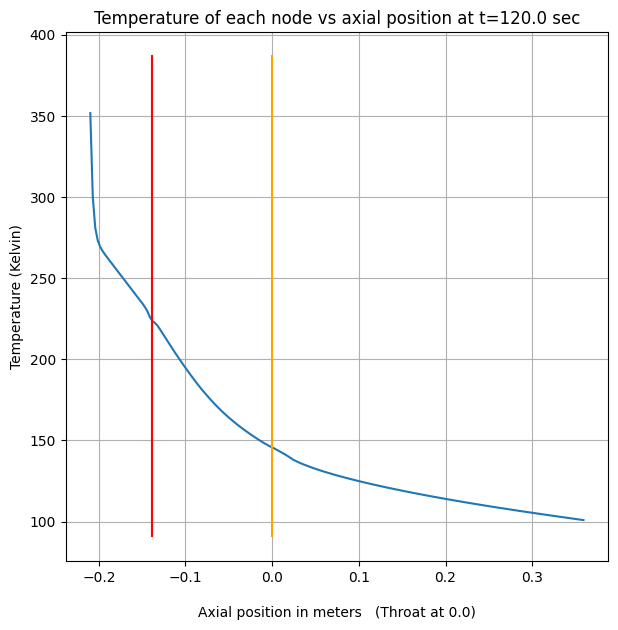

In [29]:
x4=[]
y4=[]
figure(figsize=(7, 7), dpi=100)
for i in range(len(T[steps-1])):
  x4.append(nodes_x[i])
  y4.append(T[steps-1][i])
  print(f'Temp of Nozzle: {T[steps-1][i]} K at index: {i}, position: {nodes_x[i]}')
plt.plot(x4,y4)
plt.plot([0,0],[0.9*min(y4), 1.1*max(y4)], color = 'orange')
plt.plot([nodes_x[end_of_chamber_index],nodes_x[end_of_chamber_index]],[0.9*min(y4), 1.1*max(y4)], color = 'red')
plt.grid()
plt.title(f'Temperature of each node vs axial position at t={steps*delta_t} sec')
plt.ylabel('Temperature (Kelvin)')
plt.xlabel('\nAxial position in meters   (Throat at 0.0)')
plt.show()

In [30]:
print(f'thermal conductivity of copper: {k}')
print(f'kinematic viscosity of methane ^0.333-0.8: {kinematic_viscosity_meth**(.333-0.8)}')
print(f'thermal diffusivity of copper ^ -1/3: {thermal_diffusivity_nozzle**-0.333}')
print(f'diameter ^0.8-1: {(inner_liner_y[0]-outer_y[0])**(0.8-1)}')
print(f'PR number: {Pr}')
print(f'Re : {coolant_velocity[0]*(inner_liner_y[0]-outer_y[0])/kinematic_viscosity_meth}')

thermal conductivity of copper: 398
kinematic viscosity of methane ^0.333-0.8: 468.5515916474428
thermal diffusivity of copper ^ -1/3: 20.504020455995825
diameter ^0.8-1: 2.398423611497788
PR number: 0.25551896387843703
Re : 1197174.3575518013


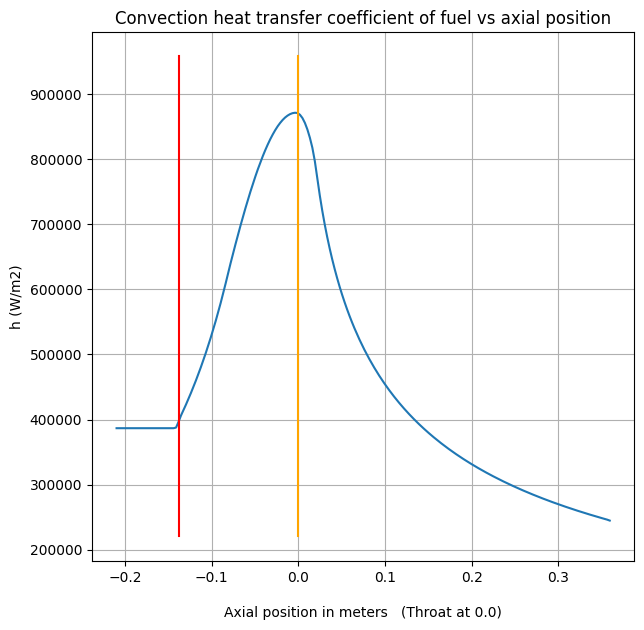

In [31]:
x1=[]
y1=[]
figure(figsize=(7, 7), dpi=100)
for i in range(len(h_fuel_array)):
  x1.append(nodes_x[i])
  y1.append(h_fuel_array[i])
  #print(f'h of fuel: {h_fuel_array[i]} W/m2 at index: {i}, position: {nodes_x[i]}')
plt.plot(x1,y1)
plt.plot([0,0],[0.9*min(y1), 1.1*max(y1)], color = 'orange')
plt.plot([nodes_x[end_of_chamber_index],nodes_x[end_of_chamber_index]],[0.9*min(y1), 1.1*max(y1)], color = 'red')
plt.grid()
plt.title('Convection heat transfer coefficient of fuel vs axial position')
plt.ylabel('h (W/m2)')
plt.xlabel('\nAxial position in meters   (Throat at 0.0)')
plt.show()

Temp of fuel: 267.36114244488937 K at index: 0, position: -0.2097763820509318
Temp of fuel: 265.3870213715539 K at index: 1, position: -0.20691755820393043
Temp of fuel: 263.411797113271 K at index: 2, position: -0.20405873435692906
Temp of fuel: 261.43546905355527 K at index: 3, position: -0.2011999105099277
Temp of fuel: 259.4580365755766 K at index: 4, position: -0.19834108666292632
Temp of fuel: 257.47949906216036 K at index: 5, position: -0.19548226281592496
Temp of fuel: 255.49985589578688 K at index: 6, position: -0.1926234389689236
Temp of fuel: 253.51910645859152 K at index: 7, position: -0.18976461512192222
Temp of fuel: 251.5372501323643 K at index: 8, position: -0.18690579127492085
Temp of fuel: 249.55428629854978 K at index: 9, position: -0.18404696742791948
Temp of fuel: 247.57021433824687 K at index: 10, position: -0.18118814358091812
Temp of fuel: 245.5850336322086 K at index: 11, position: -0.17832931973391675
Temp of fuel: 243.59874356084197 K at index: 12, position: 

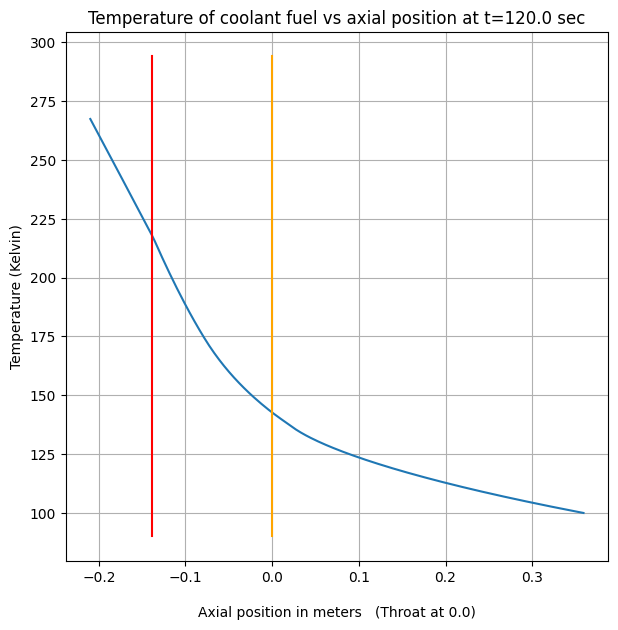

In [32]:
x2=[]
y2=[]
figure(figsize=(7, 7), dpi=100)
for i in range(len(T_fuel_history[1])):
  x2.append(nodes_x[i])
  y2.append(T_fuel_history[1][i])
  print(f'Temp of fuel: {T_fuel_history[1][i]} K at index: {i}, position: {nodes_x[i]}')
plt.plot(x2,y2)
plt.plot([0,0],[0.9*min(y2), 1.1*max(y2)], color = 'orange')
plt.plot([nodes_x[end_of_chamber_index],nodes_x[end_of_chamber_index]],[0.9*min(y2), 1.1*max(y2)], color = 'red')
plt.grid()
plt.title(f'Temperature of coolant fuel vs axial position at t={steps*delta_t} sec')
plt.ylabel('Temperature (Kelvin)')
plt.xlabel('\nAxial position in meters   (Throat at 0.0)')
plt.show()

Temp increase in fuel: 1.974121073335482 K at index: 1, position: -0.20691755820393043
Temp increase in fuel: 1.9752242582828785 K at index: 2, position: -0.20405873435692906
Temp increase in fuel: 1.9763280597157404 K at index: 3, position: -0.2011999105099277
Temp increase in fuel: 1.9774324779786525 K at index: 4, position: -0.19834108666292632
Temp increase in fuel: 1.9785375134162564 K at index: 5, position: -0.19548226281592496
Temp increase in fuel: 1.979643166373478 K at index: 6, position: -0.1926234389689236
Temp increase in fuel: 1.9807494371953567 K at index: 7, position: -0.18976461512192222
Temp increase in fuel: 1.9818563262272164 K at index: 8, position: -0.18690579127492085
Temp increase in fuel: 1.982963833814523 K at index: 9, position: -0.18404696742791948
Temp increase in fuel: 1.9840719603029129 K at index: 10, position: -0.18118814358091812
Temp increase in fuel: 1.9851807060382782 K at index: 11, position: -0.17832931973391675
Temp increase in fuel: 1.9862900713

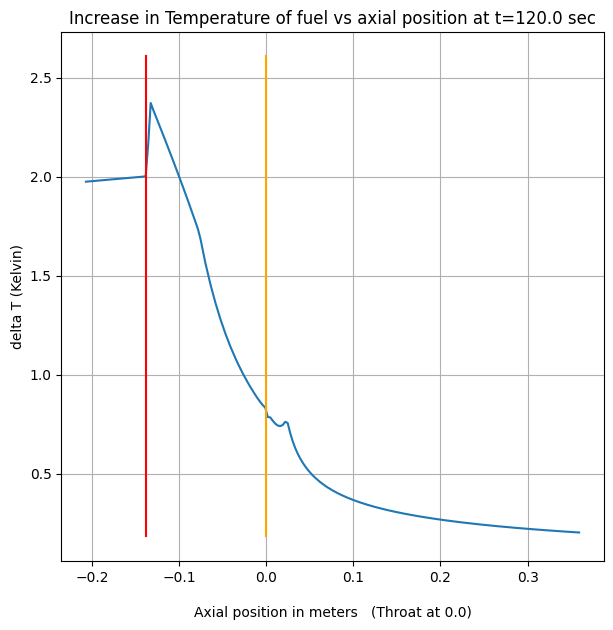

In [33]:
x3=[]
y3=[]
figure(figsize=(7, 7), dpi=100)
for i in range(len(T_fuel_history[1])-1):
  x3.append(nodes_x[i+1])
  y3.append(T_fuel_history[1][i]-T_fuel_history[1][i+1])
  print(f'Temp increase in fuel: {T_fuel_history[1][i]-T_fuel_history[1][i+1]} K at index: {i+1}, position: {nodes_x[i+1]}')
plt.plot(x3,y3)
plt.plot([0,0],[0.9*min(y3), 1.1*max(y3)], color = 'orange')
plt.plot([nodes_x[end_of_chamber_index],nodes_x[end_of_chamber_index]],[0.9*min(y3), 1.1*max(y3)], color = 'red')
plt.grid()
plt.title(f'Increase in Temperature of fuel vs axial position at t={steps*delta_t} sec')
plt.ylabel('delta T (Kelvin)')
plt.xlabel('\nAxial position in meters   (Throat at 0.0)')
plt.show()

Heat transfered to node: 10078.251067417694 W at index: 0, position: -0.2097763820509318
Heat transfered to node: 10083.883029420265 W at index: 1, position: -0.20691755820393043
Heat transfered to node: 10089.518138694697 W at index: 2, position: -0.20405873435692906
Heat transfered to node: 10095.15639699976 W at index: 3, position: -0.2011999105099277
Heat transfered to node: 10100.797806095205 W at index: 4, position: -0.19834108666292632
Heat transfered to node: 10106.442367741767 W at index: 5, position: -0.19548226281592496
Heat transfered to node: 10112.090083701167 W at index: 6, position: -0.1926234389689236
Heat transfered to node: 10117.740955736106 W at index: 7, position: -0.18976461512192222
Heat transfered to node: 10123.394985610277 W at index: 8, position: -0.18690579127492085
Heat transfered to node: 10129.052175088349 W at index: 9, position: -0.18404696742791948
Heat transfered to node: 10134.712525935985 W at index: 10, position: -0.18118814358091812
Heat transfer

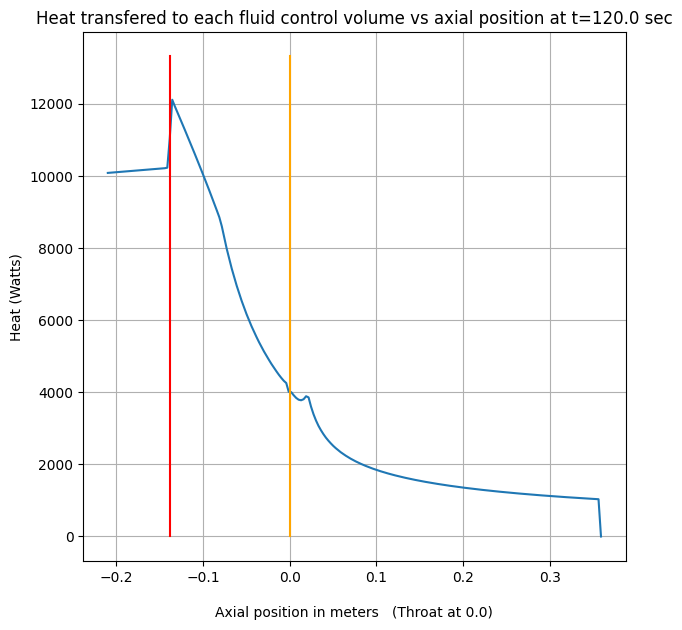

In [34]:
x5=[]
y5=[]
figure(figsize=(7, 7), dpi=100)
for i in range(len(T[steps-1])):
  x5.append(nodes_x[i])
  y5.append(heat_transfer_history[steps-2][i])
  print(f'Heat transfered to node: {heat_transfer_history[steps-2][i]} W at index: {i}, position: {nodes_x[i]}')
plt.plot(x5,y5)
plt.plot([0,0],[0.9*min(y5), 1.1*max(y5)], color = 'orange')
plt.plot([nodes_x[end_of_chamber_index],nodes_x[end_of_chamber_index]],[0.9*min(y5), 1.1*max(y5)], color = 'red')
plt.grid()
plt.title(f'Heat transfered to each fluid control volume vs axial position at t={steps*delta_t} sec')
plt.ylabel('Heat (Watts)')
plt.xlabel('\nAxial position in meters   (Throat at 0.0)')
plt.show()

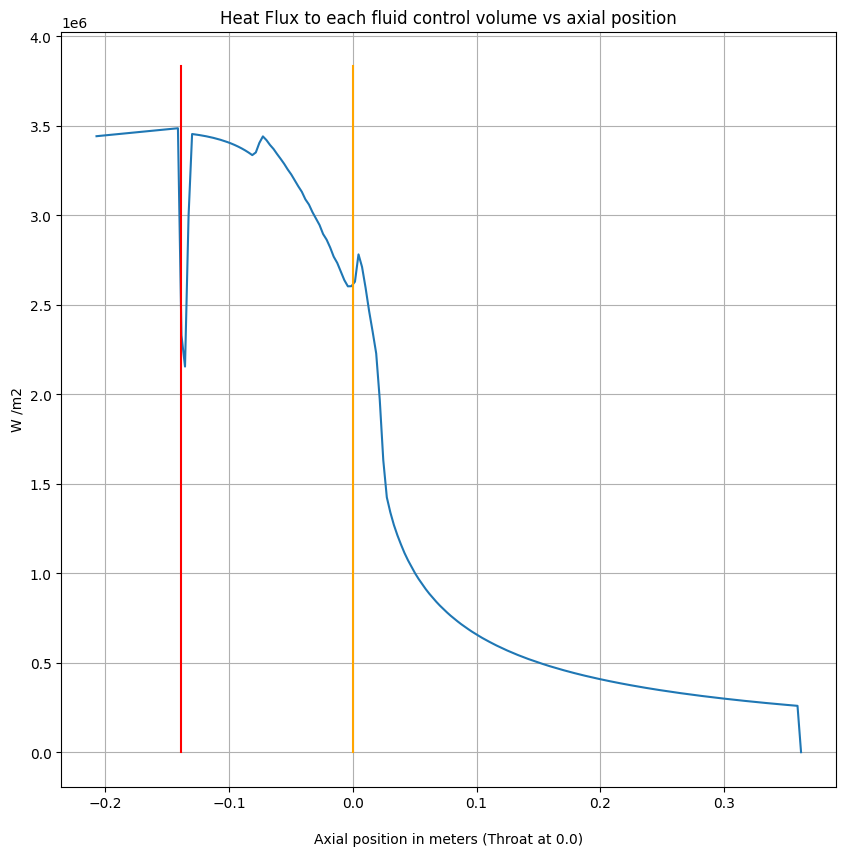

In [35]:
figure(figsize=(10, 10), dpi=100)
plt.plot(nodes_x[1:],heat_flux_history[len(heat_flux_history)-1])
plt.plot([0,0],[0.9*min(heat_flux_history[len(heat_flux_history)-1]), 1.1*max(heat_flux_history[len(heat_flux_history)-1])], color = 'orange')
plt.plot([nodes_x[end_of_chamber_index],nodes_x[end_of_chamber_index]],[0.9*min(heat_flux_history[len(heat_flux_history)-1]), 1.1*max(heat_flux_history[len(heat_flux_history)-1])], color = 'red')
plt.grid()
plt.title('Heat Flux to each fluid control volume vs axial position')
plt.ylabel('W /m2')
plt.xlabel('\nAxial position in meters (Throat at 0.0)')
plt.show()

In [36]:
data = {'Nozzle Temp (Kelvin)': y4,
        'Coolant Temp (Kelvin)': y2,
        'Coolant Vel (m/s)': coolant_velocity[1:],
        'Heat Transfer (W)': y5,
        'Coolant h (W/m2)': y1}

df = pd.DataFrame(data)

In [37]:
df

,Nozzle Temp (Kelvin),Coolant Temp (Kelvin),Coolant Vel (m/s),Heat Transfer (W),Coolant h (W/m2)
0,351.652660,267.361142,181.476430,10078.251067,386634.137062
1,299.859767,265.387021,181.476430,10083.883029,386634.137062
2,280.930763,263.411797,181.476430,10089.518139,386634.137062
3,273.187043,261.435469,181.476430,10095.156397,386634.137062
4,269.249775,259.458037,181.476430,10100.797806,386634.137062
...,...,...,...,...,...
195,101.856168,100.814635,104.866400,1045.871584,249317.694568
196,101.645321,100.609771,104.289345,1041.741984,248219.539043
197,101.430050,100.405715,103.719514,1037.642211,247133.938699
198,101.202859,100.202462,103.145694,1033.607545,246039.534888


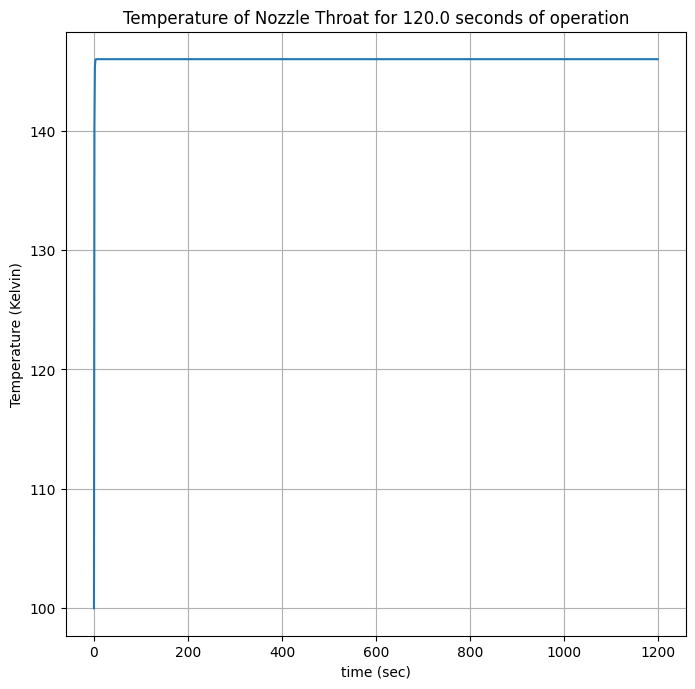

In [38]:
sample = []
time = [i for i in range(steps)]
for i in range(len(T)):
    sample.append(T[i][throat_index])

figure(figsize=(8, 8), dpi=100)
plt.plot(time,sample)
plt.xlabel('time (sec)')
plt.ylabel('Temperature (Kelvin)')
plt.title(f'Temperature of Nozzle Throat for {steps*delta_t} seconds of operation')
plt.grid()
plt.show()